## Data Preprocessing

In [0]:
import pandas as pd

In [0]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [5]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [6]:
diabetes.columns, type(diabetes.columns), diabetes.shape

(Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
        'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
       dtype='object'), pandas.core.indexes.base.Index, (768, 10))

In [0]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
        'Insulin', 'BMI', 'Pedigree']

In [0]:

diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))


In [9]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


## Feature Columns

In [10]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [0]:
import tensorflow as tf

### Continuous Features

In [0]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

## Categorical Features

In [0]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A', 'B', 'C', 'D'])
#alternatively
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10000)


### Converting Continuous to Categorical type

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

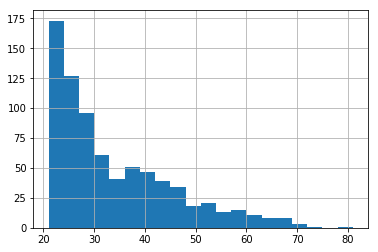

In [15]:
diabetes['Age'].hist(bins = 20)

In [0]:
#allow more exploring on different ranges of age
age_buckets = tf.feature_column.bucketized_column(age, boundaries=list(range(20, 90, 10)))

### Putting them together

In [0]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_buckets]

## Train Test Split

In [18]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Number_pregnant          768 non-null float64
Glucose_concentration    768 non-null float64
Blood_pressure           768 non-null float64
Triceps                  768 non-null float64
Insulin                  768 non-null float64
BMI                      768 non-null float64
Pedigree                 768 non-null float64
Age                      768 non-null int64
Class                    768 non-null int64
Group                    768 non-null object
dtypes: float64(7), int64(2), object(1)
memory usage: 60.1+ KB


In [0]:
x_data = diabetes.drop('Class', axis=1)

In [0]:
labels = diabetes['Class']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x_data, labels, test_size = 0.2, random_state = 0)

### Input Function

In [0]:
input_func = tf.estimator.inputs.pandas_input_fn(x=x_train, y=y_train, batch_size=10, num_epochs=100, shuffle=True)


## Creating the LinearClassifier Model

In [24]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpropf_lmr', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f7ea3425080>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [25]:
model.train(input_fn=input_func)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpropf_lmr/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 238.988
INFO:tensorflow:loss = 6.0764484, step = 101 (0.430 sec)
INFO:tensorflow:global_step/sec: 337.358
INFO:tensorflow:loss = 6.0737844, step = 201 (0.306 sec)
INFO:tensorflow:global_step/sec: 

## Evaluation

In [0]:
train_input_func = tf.estimator.inputs.pandas_input_fn(x=x_train, y=y_train, batch_size=1, num_epochs=1, shuffle=False)

eval_input_func = tf.estimator.inputs.pandas_input_fn(x = x_test, y=y_test, batch_size=1, num_epochs=1, shuffle=False)


In [27]:
#different steps output confusing Evaluation [?/?]
train_results = model.evaluate(train_input_func)
eval_results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-13T03:10:31Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/tmpropf_lmr/model.ckpt-6140
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-13-03:10:34
INFO:tensorflow:Saving dict for global step 6140: accuracy = 0.7703583, accuracy_baseline = 0.64006513, auc = 0.83189994, auc_precision_recall = 0.71928334, average_loss = 0.48950306, global_step = 6140, label/mean = 0.35993487, loss = 0.48950306, precision = 0.7222222, prediction/mean = 0.36732802, recall = 0.5882353
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6140: /tmp/tmpropf_lmr/model.ckpt-6140
INFO:tensorflow:Calling 

In [28]:
for key in train_results:
    print (key, train_results[key], eval_results[key])

accuracy 0.7703583 0.77922076
accuracy_baseline 0.64006513 0.6948052
auc 0.83189994 0.82839537
auc_precision_recall 0.71928334 0.6683782
average_loss 0.48950306 0.47254068
label/mean 0.35993487 0.3051948
loss 0.48950306 0.47254068
precision 0.7222222 0.6756757
prediction/mean 0.36732802 0.34925416
recall 0.5882353 0.5319149
global_step 6140 6140


## Prediction

In [0]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x = x_test, batch_size=1, num_epochs=1, shuffle=False)


In [0]:
predictions = model.predict(pred_input_func)

In [31]:
pred_values = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpropf_lmr/model.ckpt-6140
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [32]:
print ('The classes are:')
for i in range(len(pred_values)):
    print (pred_values[i]['classes'], end = ' ')

The classes are:
[b'1'] [b'0'] [b'0'] [b'1'] [b'0'] [b'0'] [b'1'] [b'1'] [b'0'] [b'1'] [b'0'] [b'1'] [b'0'] [b'0'] [b'0'] [b'0'] [b'1'] [b'0'] [b'0'] [b'0'] [b'1'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'1'] [b'0'] [b'0'] [b'1'] [b'0'] [b'0'] [b'0'] [b'0'] [b'1'] [b'1'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'1'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'1'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'1'] [b'1'] [b'0'] [b'1'] [b'0'] [b'1'] [b'1'] [b'0'] [b'0'] [b'0'] [b'0'] [b'1'] [b'0'] [b'1'] [b'0'] [b'0'] [b'0'] [b'1'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'1'] [b'1'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'1'] [b'0'] [b'0'] [b'0'] [b'1'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'1'] [b'0'] [b'0'] [b'1'] [b'1'] [b'0'] [b'1'] [b'0'] [b'1'] [b'0'] [b'1'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'1'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'1'] [b'1'] [b'1'] [b'0'] [b'0'] [b'0'] [b'0'] [b'

## DNN Classifier

In [33]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10, 10, 10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpxow_16pa', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f7ea2e07a58>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [34]:
dnn_model.train(input_fn=input_func)

INFO:tensorflow:Calling model_fn.


ValueError: ignored

In [0]:
embedded_group_column = tf.feature_column.embedding_column(assigned_group, dimension=len(set(diabetes['Group'].to_numpy())))


In [0]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,embedded_group_column, age_buckets]

In [0]:
input_func = tf.estimator.inputs.pandas_input_fn(x=x_train, y=y_train, batch_size=10, num_epochs=100, shuffle=True)


In [39]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[5, 5, 5], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp81dhyhc_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f7e9b3b8828>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [40]:
dnn_model.train(input_fn=input_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp81dhyhc_/model.ckpt.
INFO:tensorflow:loss = 6.0993466, step = 1
INFO:tensorflow:global_step/sec: 127.229
INFO:tensorflow:loss = 5.069416, step = 101 (0.791 sec)
INFO:tensorflow:global_step/sec: 361.34
INFO:tensorflow:loss = 5.524232, step = 201 (0.274 sec)
INFO:tensorflow:global_step/sec: 326.272
INFO:tensorflow:loss = 6.3770742, step = 301 (0.306 sec)
INFO:tensorflow:global_step/sec: 386.242
INFO:tensorflow:loss = 5.8555193, step = 401 (0.261 sec)
INFO:tensorflow:global_step/sec: 313.116
INFO:tensorflow:loss = 4.672826, step = 501

## Evaluation

In [0]:
train_input_func = tf.estimator.inputs.pandas_input_fn(x=x_train, y=y_train, batch_size=1, num_epochs=1, shuffle=False)

eval_input_func = tf.estimator.inputs.pandas_input_fn(x = x_test, y=y_test, batch_size=1, num_epochs=1, shuffle=False)


In [44]:
train_results = dnn_model.evaluate(train_input_func)
eval_results = dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-13T03:18:47Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp81dhyhc_/model.ckpt-6140
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-13-03:18:50
INFO:tensorflow:Saving dict for global step 6140: accuracy = 0.7980456, accuracy_baseline = 0.64006513, auc = 0.8669131, auc_precision_recall = 0.7935038, average_loss = 0.44000706, global_step = 6140, label/mean = 0.35993487, loss = 0.44000706, precision = 0.7461929, prediction/mean = 0.34229046, recall = 0.6651584
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6140: /tmp/tmp81dhyhc_/model.ckpt-6140
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-13T03:18:51Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Resto

In [45]:
for key in train_results:
    print (key, train_results[key], eval_results[key])

accuracy 0.7980456 0.8246753
accuracy_baseline 0.64006513 0.6948052
auc 0.8669131 0.85583615
auc_precision_recall 0.7935038 0.7207469
average_loss 0.44000706 0.430677
label/mean 0.35993487 0.3051948
loss 0.44000706 0.430677
precision 0.7461929 0.7380952
prediction/mean 0.34229046 0.32631382
recall 0.6651584 0.65957445
global_step 6140 6140


## Prediction

In [47]:
predictions = dnn_model.predict(pred_input_func)
pred_values = list(predictions)
print ('The classes are:')
for i in range(len(pred_values)):
    print (pred_values[i]['classes'], end = ' ')

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp81dhyhc_/model.ckpt-6140
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
The classes are:
[b'1'] [b'0'] [b'0'] [b'1'] [b'0'] [b'0'] [b'1'] [b'1'] [b'0'] [b'0'] [b'1'] [b'1'] [b'0'] [b'0'] [b'0'] [b'0'] [b'1'] [b'0'] [b'0'] [b'0'] [b'1'] [b'1'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'1'] [b'0'] [b'0'] [b'1'] [b'0'] [b'0'] [b'1'] [b'0'] [b'1'] [b'0'] [b'0'] [b'0'] [b'1'] [b'0'] [b'0'] [b'0'] [b'1'] [b'1'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'1'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'1'] [b'0'] [b'0'] [b'1'] [b'1'] [b'1'] [b'1'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'1'] [b'1'] [b'0'] [b'0'] [b'1'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'1'] [b'0'] [b'0'] [b'0'] [b'0'] [b'0'] [b'1'] [b'0'] [b'0'] [b'1'] [b'1'] [b'0'] [b'0'] [b'0'] [